In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length','sepal-width','petal-length','petal-width','class']

data = pd.read_csv(url,names=names)

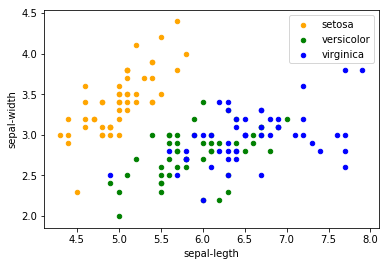

In [3]:
fig = data[data['class']=='Iris-setosa'].plot(kind='scatter',x='sepal-length',y='sepal-width',color='orange',label='setosa')
data[data['class']=='Iris-versicolor'].plot(kind='scatter',x='sepal-length',y='sepal-width',color='green',label='versicolor',ax=fig)
data[data['class']=='Iris-virginica'].plot(kind='scatter',x='sepal-length',y='sepal-width',color='blue',label='virginica',ax=fig)

fig.set_xlabel('sepal-legth')
fig.set_ylabel('sepal-width')
fig=plt.gcf()
plt.show()

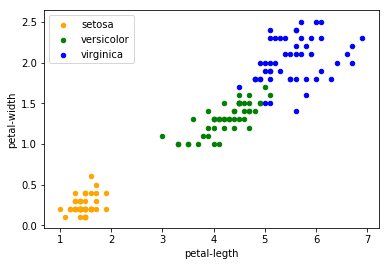

In [4]:
fig1 = data[data['class']=='Iris-setosa'].plot(kind='scatter',x='petal-length',y='petal-width',color='orange',label='setosa')
data[data['class']=='Iris-versicolor'].plot(kind='scatter',x='petal-length',y='petal-width',color='green',label='versicolor',ax=fig1)
data[data['class']=='Iris-virginica'].plot(kind='scatter',x='petal-length',y='petal-width',color='blue',label='virginica',ax=fig1)

fig1.set_xlabel('petal-legth')
fig1.set_ylabel('petal-width')
fig1=plt.gcf()
plt.show()

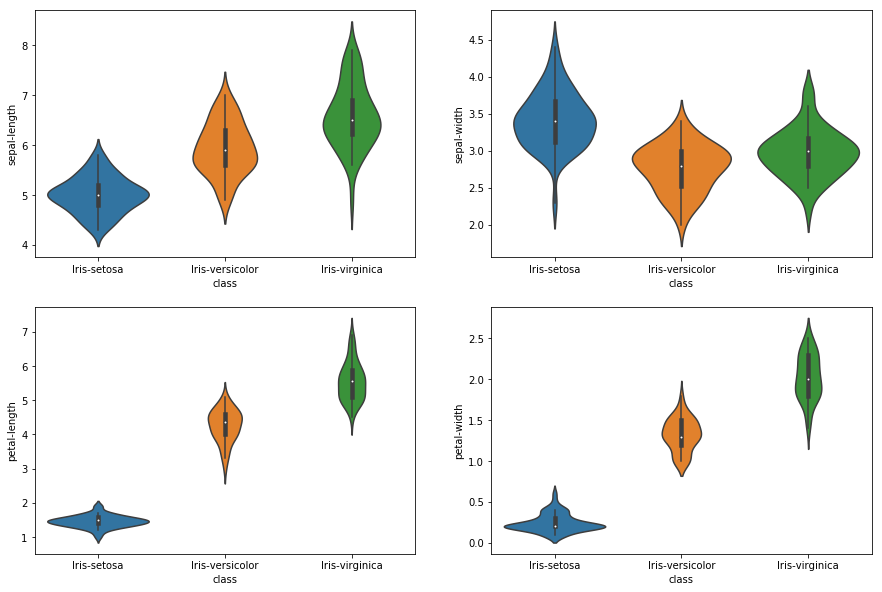

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='class',y='sepal-length',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='class',y='sepal-width',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='class',y='petal-length',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='class',y='petal-width',data=data)

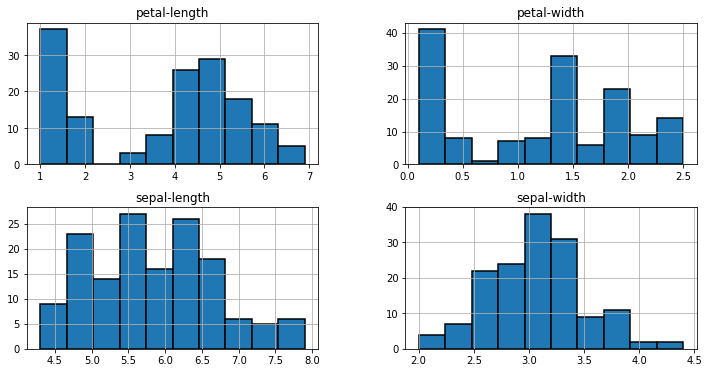

In [12]:
data.hist(linewidth=1.5,edgecolor='black')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

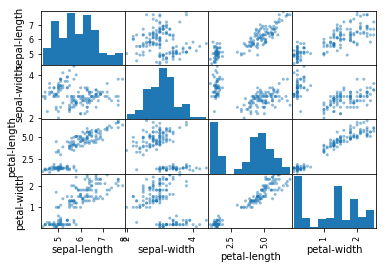

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

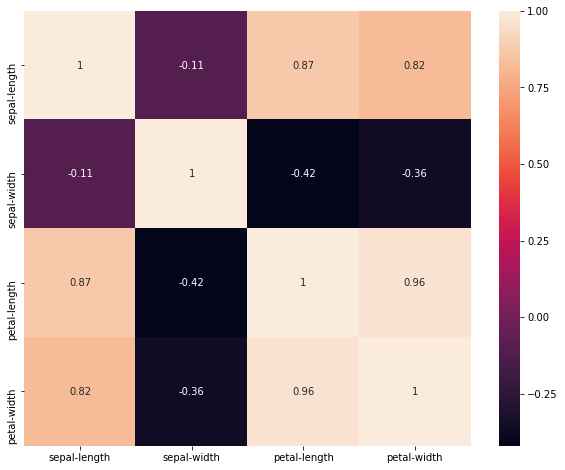

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [23]:
y=data['class']
X=data.drop('class',axis=1)
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X=scale.fit_transform(X)

In [45]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [43]:
models=[]
models.append(('knn',KNeighborsClassifier(n_neighbors=5)))
models.append(('svm',SVC(kernel='rbf')))
models.append(('lr',LogisticRegression()))
models.append(('dt',DecisionTreeClassifier(criterion='entropy')))
models.append(('rf',RandomForestClassifier(n_estimators=10,criterion='entropy')))

In [47]:
kfold=KFold(n_splits=5)
for name,model in models:
    cv_results = cross_val_score(model,X,y,cv=kfold)
    print(cv_results.mean())

0.9
0.9066666666666666
0.7666666666666667
0.9199999999999999
0.9066666666666666


In [52]:
classifier = SVC(kernel='rbf')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(classifier.score(X_test,y_test))

0.9777777777777777


In [53]:
print(confusion_matrix(y_test,y_pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
